In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




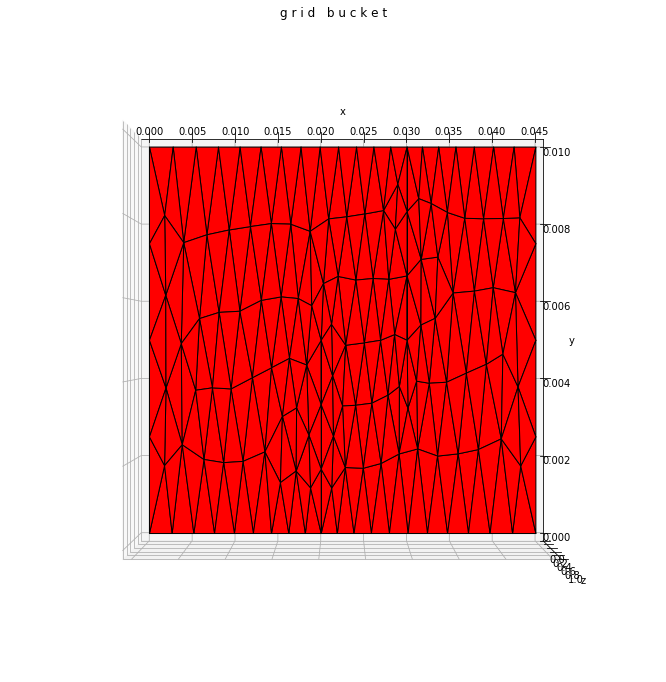

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter={"aperture":1e-3,
           "fracture_perm":1.0,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           "perm":0.3,
           #"perm":1,
          
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

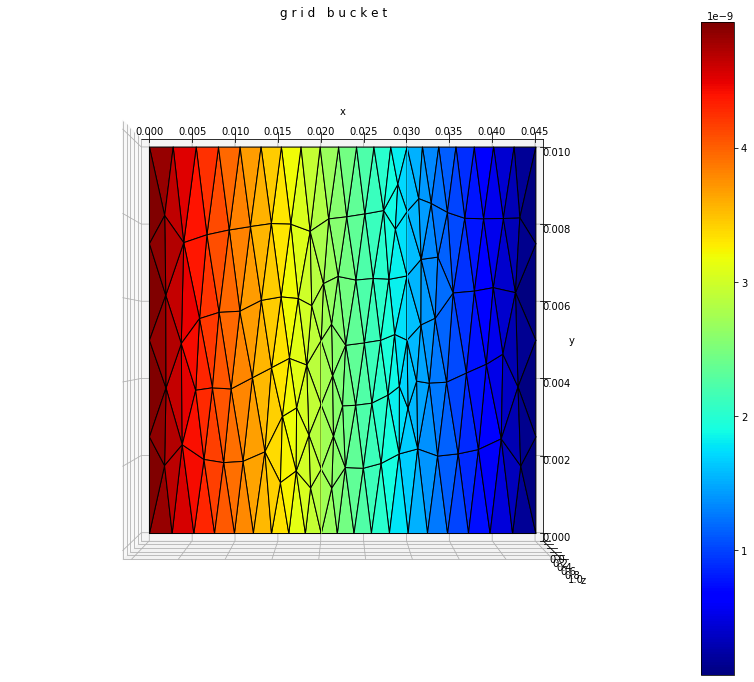

In [6]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [7]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    #"por_frac":0.00001,
    #"por":1.0,
    "por_frac":0.3,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [8]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [9]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.00446,
       "rate_const":0.0005,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


In [10]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)
#ciao?1



In [11]:
for g,d in gb:
    print(d[pp.PARAMETERS]["Ca"]["darcy_flux"])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.87730548e-11
  3.83490932e-11  0.00000000e+00 -1.71978145e-11  2.63787533e-11
 -5.17694208e-11  3.34761507e-11  1.65807332e-11  0.00000000e+00
 -5.11870154e-11  1.57955553e-11 -6.79546954e-12  3.11510732e-11
 -3.57095179e-11  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.30978151e-11  3.49995290e-11  0.00000000e+00 -8.32143194e-11
 -5.65966934e-11  0.00000000e+00  8.38525257e-11  5.69443941e-11
  8.36135645e-11  0.00000000e+00  5.74337846e-11  0.00000000e+00
 -8.57646562e-11 -5.88724526e-11  0.00000000e+00  5.18566121e-11
 -3.83490932e-11  0.00000000e+00  4.21807087e-11 -5.18566121e-11
  0.00000000e+00 -4.21807087e-11  6.76764525e-11  0.00000000e+00
 -6.30714515e-11  6.76764525e-11  0.00000000e+00 -6.30714515e-11
 -6.19587863e-11  0.00000000e+00  6.33695303e-11  6.19587863e-11
  0.00000000e+00 -6.33695303e-11  7.47475766e-11 -7.47475766e-11
  5.65966934e-11  0.00000000e+00 -5.60767582e-11  3.87730548e-11
  0.00000000e+00  5.53023

In [12]:
print(rhs_source_adv_Ca)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


P0_flux
[[ 3.29856566e-08  3.34299197e-08  3.26394405e-08  3.26794979e-08
   3.24266185e-08  3.23759833e-08  3.06777890e-08  3.24386501e-08
   3.28741940e-08  3.34313354e-08  3.23837990e-08  3.25588105e-08
   3.25308551e-08  3.21281883e-08  3.24042276e-08  3.21703414e-08
   2.99629296e-08  3.18854644e-08  3.19933627e-08  3.18091620e-08
   3.22947948e-08  3.36650244e-08  3.28774073e-08  3.27828341e-08
   3.28354833e-08  3.38849264e-08  3.34935190e-08  3.24066549e-08
   3.22702500e-08  3.30780652e-08  3.27853590e-08  3.15816189e-08
   3.24828692e-08  3.30331883e-08  3.25094553e-08  3.18819419e-08
   3.39172393e-08  3.24566213e-08  3.23447670e-08  3.39556572e-08
   3.24993397e-08  3.25440873e-08  3.35166420e-08  3.24097742e-08
   3.31957110e-08  3.05601523e-08  3.21417301e-08  3.23742089e-08
   3.28082898e-08  3.29380348e-08  3.22196683e-08  3.26261843e-08
   3.27475070e-08  3.14458622e-08  3.29191817e-08  3.27252412e-08
   3.39836423e-08  3.12951078e-08  3.32050416e-08  3.25846521e-08
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


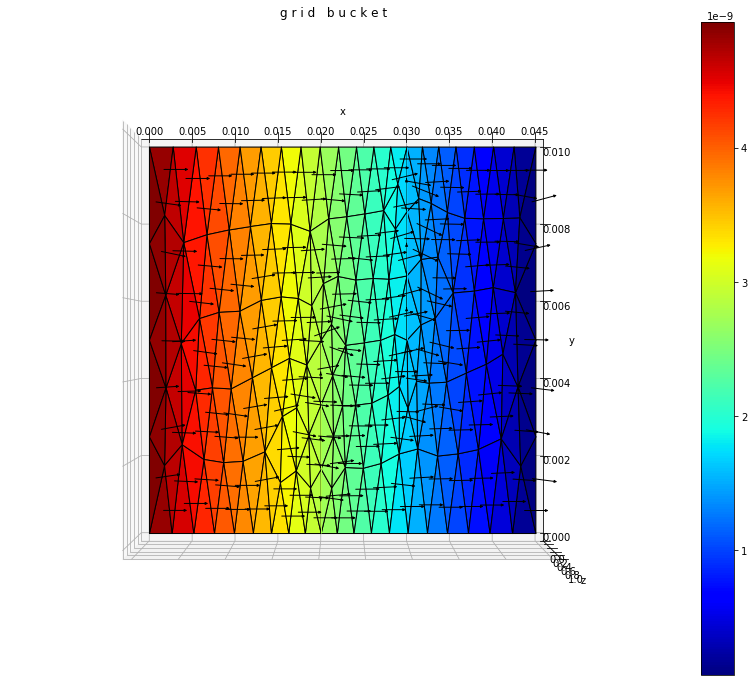

In [13]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

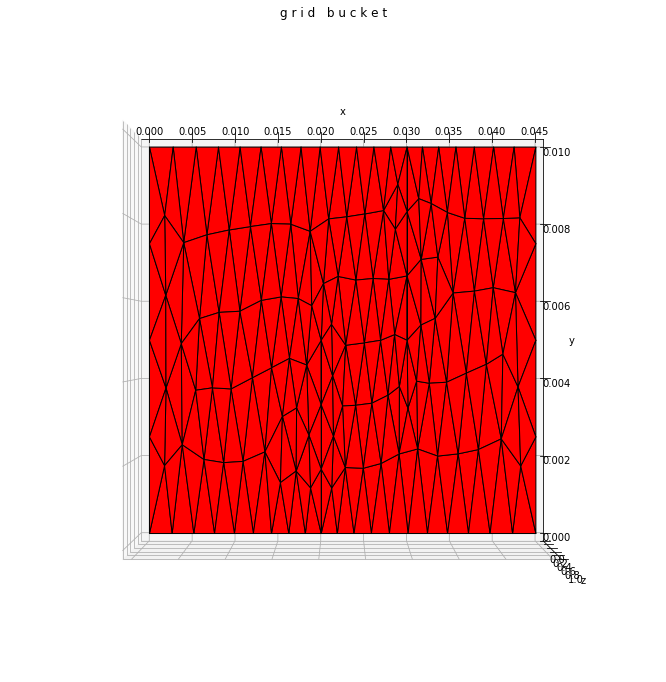

In [14]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [15]:
parameter={"aperture":1e-3,
           "fracture_perm":1.0,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
           #"fracture_perm":1.0,
           "perm":0.3,
           #"perm":1.0,
           #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[3.0e-7,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

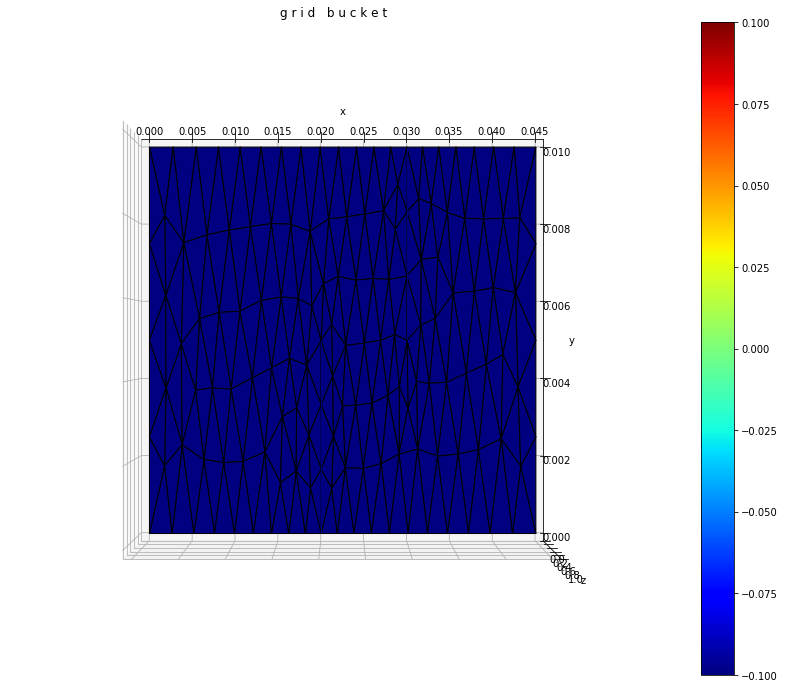

In [16]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [17]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.3,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [18]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

In [19]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca_zero_frac")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3_zero_frac")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Ca
[0. 0. 0.]
Ca
[0. 0. 0.]
CaSiO3
[16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504
 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 16.7504 1

 2.49642058e-06 2.49642058e-06 2.49642058e-06 2.49642058e-06]
Ca
[0.84487426 0.84487429 0.84487429 0.84487429 0.84487408 0.84487284
 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487429 0.84487429 0.84487429 0.84487345 0.84487429 0.84487429
 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487429 0.84487429 0.84487236 0.84487429 0.84487429 0.84487429
 0.84487429 0.84486885 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487402 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84390696 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429
 0.84487429 0.84447935 0.84487429 0.84487429 0.84487429 0.84487429
 0.79284962 0.84486082 0.84487429 0.84469155 0.84487429 0.84487429
 0.84487428 0.84487429 0.84487429 0.84487429 0.82496493 0.84487429
 0.84487429 0.84487429 0.84487429 0.84487429 0.84487429 0.844874

Ca
[1.51547662 1.51549722 1.51550589 1.51550589 1.51538863 1.51504641
 1.51550209 1.51550565 1.51550589 1.51550589 1.51550583 1.51550589
 1.51550589 1.51550589 1.51550589 1.515219   1.51550588 1.51550589
 1.51550589 1.51550589 1.51550588 1.51550589 1.51550589 1.51550589
 1.51550589 1.51550589 1.51492134 1.51550587 1.51550589 1.51550546
 1.51550589 1.51446949 1.51550589 1.51550589 1.51550589 1.51550565
 1.51550589 1.51550589 1.51550588 1.51550589 1.51550589 1.51550589
 1.5153563  1.51550589 1.51550589 1.51550493 1.51550589 1.51550589
 1.51550589 1.51550587 1.51550589 1.51550479 1.51550589 1.51550589
 1.48294206 1.51550589 1.51550589 1.51550589 1.51550589 1.51550588
 1.51550589 1.49932501 1.51550589 1.5155039  1.51550589 1.51550589
 1.1594005  1.51380847 1.51550589 1.50453457 1.51550525 1.51550589
 1.51549735 1.51550579 1.51550589 1.51550589 1.30309125 1.51550589
 1.51550589 1.51550138 1.51550589 1.51550589 1.51550588 1.51550589
 1.47148469 1.51190184 1.51550589 1.51550589 1.40586534 1.5

Ca
[2.27915819 2.28042065 2.28137547 2.28137547 2.27550294 2.26616802
 2.28087586 2.28131054 2.28137547 2.28137547 2.28135201 2.28137544
 2.28137547 2.28137547 2.28137541 2.27104926 2.28137329 2.28137547
 2.28137547 2.28137547 2.28136895 2.2813754  2.28137547 2.28137547
 2.28137545 2.28137547 2.26294413 2.28136618 2.28137547 2.28128796
 2.28137547 2.25640264 2.28137547 2.28137547 2.28137547 2.28130629
 2.28137547 2.28137547 2.28137467 2.28137547 2.28137547 2.28137547
 2.27422991 2.28137547 2.28137547 2.28118927 2.28137525 2.28137547
 2.28137547 2.2813661  2.28137547 2.28117831 2.28137547 2.28137547
 2.03881554 2.28137547 2.28137519 2.28137547 2.28137547 2.2813727
 2.28137547 2.13558069 2.28137547 2.28110074 2.28137547 2.28137547
 1.27552318 2.24884584 2.28137547 2.16100853 2.28122509 2.28137547
 2.28058551 2.28134727 2.28137547 2.28137547 1.5218851  2.28137547
 2.28137546 2.28083003 2.28137547 2.28137547 2.28137448 2.28137547
 2.00468693 2.22329284 2.28137538 2.28137534 1.79319512 2.28

Ca
[2.97843448 2.99105604 3.00633625 3.00633624 2.95006869 2.89534618
 2.99711526 3.00439502 3.00633625 3.00633625 3.0054278  3.00632991
 3.00633625 3.00633625 3.00632845 2.92499407 3.00617099 3.00633625
 3.00633624 3.00633625 3.00595641 3.00632575 3.00633609 3.00633625
 3.00633272 3.00633625 2.87739891 3.00588017 3.00633625 3.00406404
 3.00633625 2.85451248 3.00633625 3.00633625 3.00633613 3.0041823
 3.00633625 3.00633589 3.0062749  3.00633625 3.00633615 3.00633619
 2.9406626  3.00633625 3.00633625 3.00188881 3.00631405 3.00633625
 3.00633625 3.00592288 3.00633625 3.00185094 3.00633575 3.00633625
 2.29453044 3.00633625 3.00630642 3.00633625 3.00633625 3.00617557
 3.00633624 2.51222747 3.00633625 3.00092232 3.00633625 3.00633625
 1.25252127 2.83011991 3.00633625 2.55975415 3.00237223 3.00633538
 2.99440926 3.0053779  3.00633622 3.00633625 1.52881777 3.00633623
 3.00633398 2.99679886 3.00633625 3.00633506 3.00625603 3.00633625
 2.24942702 2.73319518 3.00632326 3.00631753 1.90960268 3.00

Ca
[3.55210592 3.60154306 3.69211688 3.69211603 3.45912429 3.31223649
 3.63081555 3.67371005 3.69211688 3.69211688 3.68173502 3.69188953
 3.69211688 3.69211656 3.69188932 3.39453083 3.6891258  3.69211684
 3.6921155  3.69211688 3.68643679 3.69180384 3.69210507 3.69211688
 3.69198666 3.6921168  3.26620334 3.68594972 3.69211688 3.67222869
 3.69211688 3.22724018 3.69211688 3.69211682 3.69210878 3.67134979
 3.69211686 3.69209646 3.6909326  3.69211688 3.69210893 3.69211153
 3.42962017 3.69211688 3.69211688 3.6565522  3.69159029 3.69211688
 3.69211688 3.68679154 3.69211688 3.65725715 3.69208744 3.69211688
 2.33514885 3.69211688 3.69139679 3.69211687 3.69211688 3.6895824
 3.69211628 2.64744165 3.69211688 3.6534095  3.69211688 3.69211669
 1.19735341 3.18495451 3.69211688 2.70545863 3.65868438 3.69207841
 3.62174857 3.68190764 3.69211399 3.69211687 1.47081469 3.692115
 3.69201824 3.63074542 3.69211688 3.69206264 3.69053874 3.69211681
 2.29185749 2.98876326 3.69172095 3.69157754 1.88822375 3.6921

Ca
[3.93071771 4.04196007 4.34052415 4.34049343 3.74660879 3.49470413
 4.11908884 4.2531944  4.34052417 4.34052412 4.28389581 4.33759415
 4.34052414 4.34051068 4.33791179 3.64013096 4.31784934 4.34052186
 4.34048159 4.34052406 4.30329353 4.33694388 4.34025519 4.34052378
 4.33876371 4.34051988 3.41869763 4.30241943 4.34052418 4.2503692
 4.34052411 3.37424802 4.34052417 4.34052097 4.34034244 4.2418747
 4.34052284 4.3401364  4.33067716 4.3405236  4.34032391 4.34038722
 3.69037615 4.34052418 4.34052418 4.1932085  4.33538255 4.34052418
 4.34052418 4.30813313 4.34052396 4.19821024 4.33995771 4.34052383
 2.27371269 4.34052405 4.33354444 4.34052335 4.34052418 4.32250017
 4.34050213 2.63185732 4.34052414 4.19008552 4.34052417 4.34051555
 1.13838643 3.32155837 4.34052417 2.69083994 4.19791149 4.33991037
 4.10361868 4.28677759 4.34043724 4.34052303 1.40042681 4.34046675
 4.33903223 4.12273841 4.34052418 4.339659   4.32748632 4.34052011
 2.23563759 3.0412338  4.33599587 4.33467186 1.816518   4.340

Ca
[4.09760901 4.27444272 4.95339876 4.95293932 3.83028421 3.49950158
 4.41239494 4.68957561 4.9533994  4.95339725 4.76327793 4.93431927
 4.95339799 4.95316793 4.93736284 3.69528018 4.85658842 4.95334675
 4.95282771 4.95339534 4.81143359 4.93183431 4.95061514 4.95338835
 4.94125872 4.95331505 3.40258146 4.81281345 4.95339973 4.68776593
 4.95339734 3.36143097 4.95339955 4.95333279 4.95150681 4.65780517
 4.95336731 4.94987433 4.90672454 4.95338377 4.95116906 4.95183175
 3.75115301 4.95339968 4.95339973 4.55466783 4.92568643 4.95339961
 4.95339974 4.83351417 4.95339289 4.5702017  4.94828698 4.95338821
 2.17697571 4.95339536 4.91659229 4.95337623 4.95339961 4.87792779
 4.95305866 2.54551942 4.95339815 4.5596893  4.95339935 4.95324472
 1.08125772 3.30595218 4.95339911 2.60183513 4.56116283 4.94848292
 4.39722813 4.77556534 4.95227885 4.95337183 1.33056443 4.95263825
 4.94229152 4.42548124 4.95339972 4.94657962 4.89288377 4.95331077
 2.14307693 2.97723233 4.92646774 4.92021883 1.73172284 4.9

Ca
[4.09599401 4.3215517  5.5325667  5.5288951  3.7753113  3.40393322
 4.5131534  4.94636761 5.53257837 5.53253948 5.07501154 5.45566205
 5.53255144 5.53050128 5.4693997  3.62790818 5.25461102 5.53198052
 5.52833693 5.53250969 5.15939049 5.44994312 5.51615814 5.53242739
 5.48059916 5.53172025 3.29733652 5.16902996 5.53258571 4.94974614
 5.53254413 3.26207586 5.53258141 5.53186757 5.52119007 4.8843509
 5.5321925  5.51362049 5.38351106 5.53236922 5.51869258 5.52247695
 3.68262325 5.53258428 5.53258582 4.72173174 5.43437139 5.53258251
 5.53258588 5.21833344 5.53248074 4.75287819 5.50565655 5.53241001
 2.07261687 5.53251636 5.4059645  5.53226575 5.5325828  5.31433749
 5.52974944 2.43385138 5.53255701 4.74402233 5.53257677 5.53112382
 1.0268231  3.20785648 5.53257179 2.48695687 4.72817854 5.5084788
 4.5063824  5.10552581 5.5246967  5.53224488 1.2636832  5.52703212
 5.4825178  4.53954416 5.53258543 5.49999881 5.34475957 5.53161414
 2.0414921  2.86209617 5.43141044 5.41305952 1.64636967 5.521

Ca
[3.99056652 4.24176024 6.07968722 6.06129767 3.6470217  3.26479921
 4.46785882 5.02801688 6.07980526 6.07941843 5.20814177 5.86083389
 6.07952534 6.06831583 5.90002026 3.49825339 5.47731147 6.075777
 6.05959372 6.07916199 5.32443084 5.85204575 6.0159415  6.078607
 5.92287453 6.07448672 3.15649452 5.34845414 6.07989439 5.03966349
 6.07948554 3.12615784 6.07984017 6.07522184 6.03420404 4.93392245
 6.07706396 6.01065627 5.72223246 6.07818187 6.02356253 6.03732684
 3.54935149 6.07987483 6.07989664 4.72380762 5.82351179 6.07984968
 6.07989757 5.43594364 6.07897155 4.77112957 5.98449172 6.07838153
 1.96985813 6.07926262 5.76009755 6.07739217 6.07985566 5.59637174
 6.06505948 2.31696259 6.07960144 4.76702015 6.07978203 6.07138043
 0.97509716 3.07450719 6.07972629 2.36713321 4.72889114 5.99766714
 4.47312945 5.26252226 6.04444035 6.07741468 1.20007258 6.05393486
 5.92360686 4.50709703 6.07989063 5.97216098 5.64324414 6.07358166
 1.94070121 2.73063147 5.80743142 5.76926886 1.56401241 6.03431

Ca
[3.83460019 4.09310002 6.59562107 6.53127704 3.48889582 3.112622
 4.33437689 4.97294624 6.59637442 6.59396323 5.18990927 6.11437358
 6.59456597 6.55256185 6.19554113 3.34418824 5.52892933 6.57825156
 6.52782854 6.59257277 5.32631878 6.10496206 6.41519501 6.59014755
 6.23163987 6.57392432 3.00676243 5.36701044 6.5970474  4.99311911
 6.59446885 2.97973982 6.59662451 6.57638703 6.46252432 4.85303858
 6.58343927 6.40849928 5.90213672 6.58812811 6.43187387 6.4673565
 3.39161318 6.59688441 6.59707339 4.61477378 6.06380069 6.59666929
 6.59708137 5.49287015 6.59178428 4.67465263 6.3461827  6.58867734
 1.8712567  6.5933128  5.95354392 6.584289   6.59673118 5.71537725
 6.54267675 2.20232475 6.59513728 4.67594137 6.59618099 6.56283327
 0.92596672 2.93079362 6.59579921 2.24986572 4.61826333 6.38392516
 4.35032349 5.26747315 6.48369454 6.58497292 1.13964048 6.51064002
 6.22614017 4.38281592 6.59701756 6.32700244 5.77469118 6.56952612
 1.84369703 2.59773889 6.02288236 5.96128531 1.48545496 6.4601

Ca
[3.66051347 3.91548243 7.07863875 6.90871361 3.32350805 2.96066697
 4.15844022 4.83028523 7.08196365 7.07161401 5.06690941 6.20680467
 7.07396701 6.95723348 6.339948   3.1848636  5.44680973 7.02274077
 6.90395439 7.0663929  5.21141131 6.20017975 6.67885939 7.0588885
 6.38709668 7.01208467 2.85894874 5.2664388  7.08543036 4.85699519
 7.07403566 2.83410751 7.08318933 7.01808281 6.77335994 4.6944724
 7.03788036 6.6753851  5.93130975 7.05208031 6.70750295 6.77759449
 3.22921152 7.08451935 7.08562276 4.44537813 6.15027793 7.0832964
 7.08566541 5.42247337 7.06415912 4.5126207  6.55951698 7.05278816
 1.77732539 7.0697997  5.99121713 7.03899862 7.08369071 5.69253001
 6.93451188 2.09228976 7.07673306 4.51817209 7.08091509 6.98269371
 0.87930537 2.78769655 7.07914824 2.13741379 4.44768545 6.63810883
 4.18139597 5.16193695 6.80665208 7.042663   1.08223965 6.86446374
 6.36931077 4.21173481 7.08527702 6.53713886 5.75818383 6.99766277
 1.75119007 2.46880657 6.0767362  5.99407259 1.41075043 6.7644

Ca
[3.51349685 3.76144265 7.45091371 7.12992678 3.18739205 2.83781982
 3.99994121 4.67487981 7.4600003  7.43241247 4.91715554 6.17491525
 7.43823091 7.2109353  6.35088147 3.05418246 5.31125167 7.3297575
 7.12551311 7.41990491 5.06191372 6.17253467 6.78207307 7.40438677
 6.40383917 7.31109744 2.73996282 5.12520913 7.47067541 4.70496381
 7.43924859 2.7164618  7.46362796 7.32141049 6.92577292 4.5329228
 7.36003501 6.78602524 5.86239098 7.38924828 6.82104273 6.92638793
 3.09637593 7.46770476 7.47144601 4.28383763 6.11920084 7.4636796
 7.47157125 5.29748415 7.41575255 4.35368928 6.61846374 7.38900502
 1.70258909 7.42918387 5.92526279 7.36007999 7.46506121 5.59266616
 7.17258328 2.00452632 7.44613978 4.36152198 7.45670914 7.25602789
 0.84221822 2.67202126 7.4517532  2.04775306 4.28554903 6.73967796
 4.02600541 5.02109787 6.9667376  7.37003891 1.03661337 7.0589314
 6.37272954 4.05461743 7.47022255 6.59776035 5.65956155 7.28027742
 1.67756334 2.36560024 6.01813376 5.92274397 1.35134613 6.90794

Ca
[3.36929073 3.60864631 7.78669289 7.25410768 3.05528367 2.7194152
 3.84005933 4.50437373 7.80749487 7.74593405 4.74569477 6.0671337
 7.75802161 7.37310829 6.27924534 2.92747357 5.14113834 7.56100107
 7.25197645 7.72073335 4.88738563 6.06956574 6.78368214 7.69343726
 6.33478459 7.53265879 2.6254641  4.95543818 7.83480569 4.53615407
 7.76177474 2.60307898 7.81642994 7.54789376 6.97868382 4.36107901
 7.61315864 6.79856278 5.7329206  7.66479321 6.83164306 6.97274131
 2.96776342 7.82682256 7.83729498 4.11677526 6.01574036 7.81594036
 7.83757184 5.1362637  7.71442599 4.18695382 6.58063911 7.66135763
 1.63096195 7.74148321 5.79593168 7.60965217 7.81984399 5.44436936
 7.31602117 1.9203412  7.77660443 4.19605919 7.79903638 7.44275877
 0.80669219 2.56050208 7.78750253 1.96175725 4.11815224 6.74586313
 3.86742757 4.85395279 7.02308982 7.63103095 0.9929052  7.15302824
 6.28998501 3.89452197 7.8337378  6.56507651 5.51014674 7.47694837
 1.60699274 2.26647393 5.8912559  5.78819449 1.29442782 6.949

[7.59319565 7.55511384 7.49154084]
CaSiO3
[8.4631256  8.46932166 8.55515031 8.54693177 8.45502505 8.44644235
 8.47512232 8.49118788 8.5554525  8.55455941 8.49698751 8.52564054
 8.55473579 8.5488489  8.52933068 8.45151872 8.50642564 8.55178333
 8.5468415  8.55419063 8.50069503 8.52548285 8.53903572 8.55377667
 8.53059772 8.55132831 8.44413149 8.50187935 8.55584914 8.49168278
 8.55478648 8.44327525 8.55558205 8.55157513 8.54224186 8.48812204
 8.55257361 8.53909052 8.51840995 8.55335275 8.53990861 8.54225715
 8.45282171 8.55573303 8.55588599 8.48206561 8.52416315 8.5555751
 8.55588983 8.5055617  8.55409117 8.4834976  8.5354223  8.55331602
 8.42035665 8.55448779 8.5199876  8.55254211 8.55563164 8.51231148
 8.54793195 8.42660348 8.55500261 8.4834487  8.55533053 8.54994292
 8.40560651 8.44203541 8.55516376 8.42769682 8.48219879 8.53801994
 8.47529367 8.49913068 8.54317151 8.55284102 8.40838581 8.54527744
 8.53001694 8.4761972  8.55583387 8.53489562 8.51404304 8.55051374
 8.41970708 8.4349514

Ca
[3.09515936 3.31626218 8.29700072 7.2199415  2.80566229 2.49653296
 3.53088391 4.15508402 8.36774946 8.16868401 4.38437996 5.71642191
 8.20294741 7.41153534 5.97085045 2.68814445 4.76225252 7.75268924
 7.22725221 8.10115598 4.51622275 5.72663704 6.55100395 8.04363733
 6.02498243 7.70575665 2.41011595 4.58607496 8.48100494 4.18700581
 8.22192412 2.38964517 8.402271   7.72886597 6.82946398 4.01716862
 7.86149818 6.59013107 5.37389035 7.97396848 6.60979753 6.80602125
 2.72506418 8.44519465 8.49630842 3.78850567 5.67652761 8.39611803
 8.49670309 4.76783759 8.09307796 3.85568849 6.29812487 7.95409462
 1.49655761 8.16642936 5.43299507 7.84091109 8.41469502 5.07629695
 7.31694477 1.76228879 8.2671406  3.86545738 8.33332229 7.5326178
 0.74006487 2.35054043 8.29362447 1.8003108  3.78960747 6.53319585
 3.55795861 4.49211345 6.86852833 7.90072928 0.91092657 7.06392142
 5.95932119 3.58256634 8.47779535 6.29680126 5.13702528 7.58220163
 1.47456569 2.08022773 5.52462254 5.41810378 1.18765006 6.77

FINE
rd
[2.47445953e-06 2.47120532e-06 2.31839260e-06 2.37098346e-06
 2.47837918e-06 2.48213832e-06 2.46782907e-06 2.45677364e-06
 2.31374895e-06 2.32636377e-06 2.45224915e-06 2.42063056e-06
 2.32434876e-06 2.36314677e-06 2.41326293e-06 2.47985970e-06
 2.44425254e-06 2.34789022e-06 2.37052826e-06 2.33020407e-06
 2.44955085e-06 2.42028672e-06 2.39544713e-06 2.33312084e-06
 2.41175985e-06 2.34993575e-06 2.48311059e-06 2.44805633e-06
 2.30549419e-06 2.45615140e-06 2.32300886e-06 2.48333560e-06
 2.31133235e-06 2.34898957e-06 2.38557302e-06 2.45938396e-06
 2.34256562e-06 2.39389405e-06 2.42959851e-06 2.33686410e-06
 2.39351056e-06 2.38661857e-06 2.47940168e-06 2.30820670e-06
 2.30416020e-06 2.46349309e-06 2.42159234e-06 2.31189443e-06
 2.30417395e-06 2.44407289e-06 2.33046226e-06 2.46230553e-06
 2.40361857e-06 2.33816119e-06 2.49129032e-06 2.32625200e-06
 2.42813005e-06 2.34385556e-06 2.31048068e-06 2.43695495e-06
 2.36709847e-06 2.48930603e-06 2.32022367e-06 2.46212755e-06
 2.31617856e-06 

Ca
[2.81783086 3.01964159 8.51208854 6.86493989 2.55376993 2.27198745
 3.21576935 3.78859861 8.67523837 8.23872719 3.99980988 5.25601077
 8.30504612 7.10321768 5.51768445 2.44667566 4.34834178 7.56814862
 6.88360066 8.11456867 4.12024323 5.26994153 6.09927718 8.02928955
 5.56673802 7.51066723 2.19323937 4.18637188 8.98835586 3.81854056
 8.35665938 2.17462779 8.76433598 7.53511043 6.41872774 3.661029
 7.73329824 6.15573646 4.93141041 7.91002237 6.16009247 6.37995342
 2.48028528 8.88297807 9.04794146 3.45147599 5.22529259 8.73856391
 9.04503066 4.35743781 8.1126668  3.51348716 5.83440576 7.86093158
 1.36140001 8.25056505 4.98495542 7.68492818 8.79479523 4.64763104
 6.982244   1.60329021 8.45104755 3.52279437 8.58406525 7.26200044
 0.67310364 2.13901368 8.49319365 1.63789597 3.45246203 6.10185286
 3.24096749 4.10072811 6.44469167 7.79461085 0.82852965 6.67548672
 5.49239004 3.2633276  8.98474336 5.84449007 4.70254684 7.31652633
 1.34139495 1.89277236 5.06857741 4.96747917 1.08030222 6.353

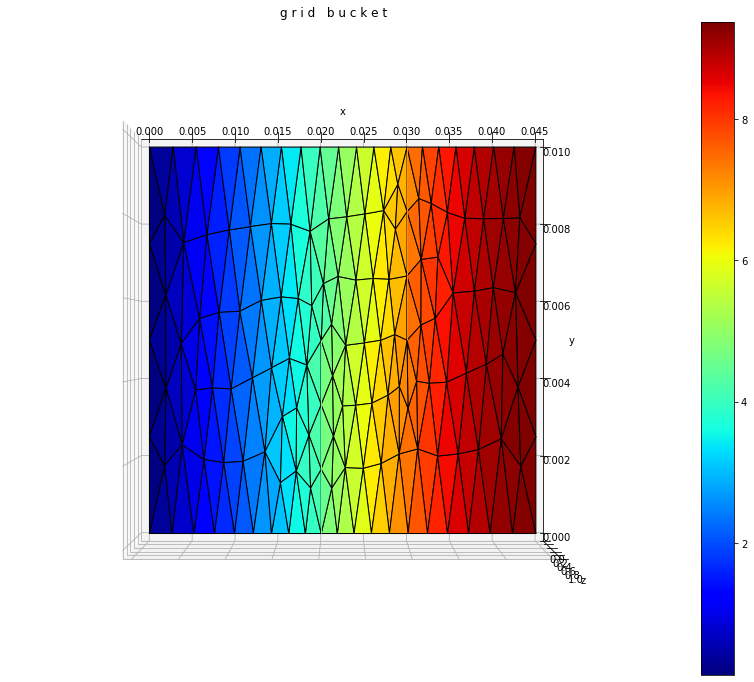

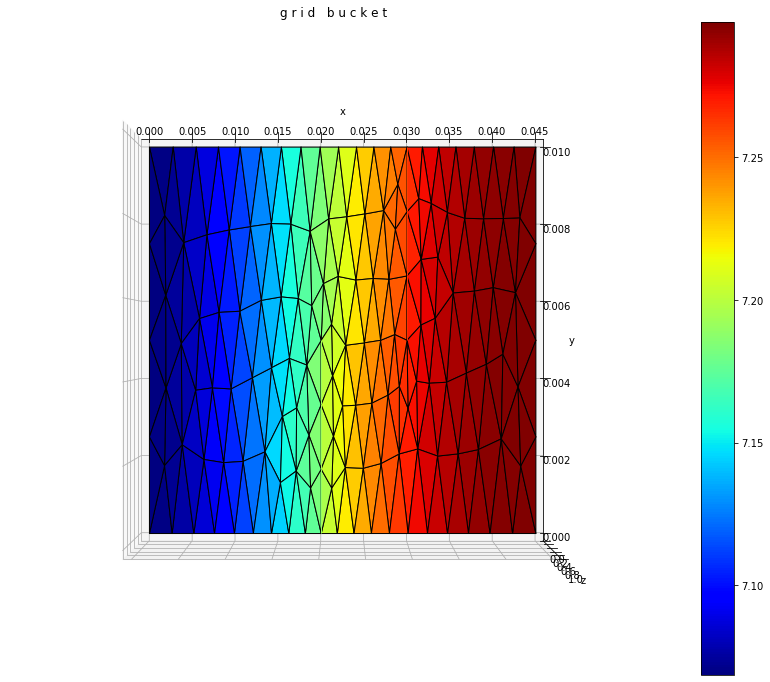

In [20]:

rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(1,n_steps+1,1):
    rd=reaction.compute_rd(tracer1,rd)
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            for g,d in gb:
                print("Ca")
                print(d[pp.STATE]["Ca"])
            for g,d in gb1:
                print("CaSiO3")
                print(d[pp.STATE]["CaSiO3"])
            print("FINE")
            print("rd")
            print(rd)
    
    #rd=reaction.compute_rd(tracer1,rd)
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    #tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)
    
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
    #print("tracer1")
    #print(tracer1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)